In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

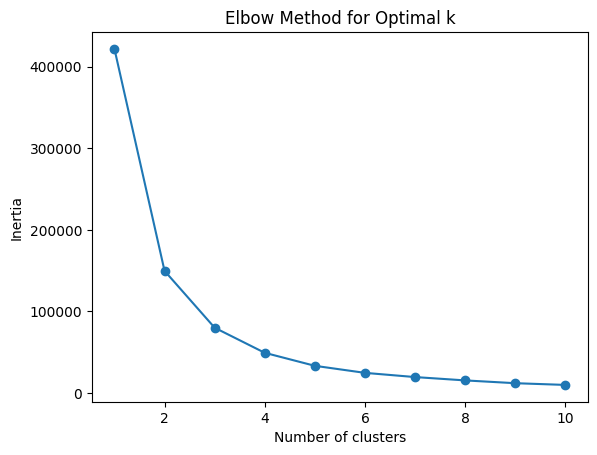

In [2]:
data = pd.read_csv("./dataset/final_merged_df.csv")

# Use only the weekly_sales column for clustering
X = data[['weekly_sales']]

# Scale the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (Elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [3]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.head()

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size,year,month,iso_week
date,,,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,24924.50,False,A,151315,2010,2,5
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,50605.27,False,A,151315,2010,2,5
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,13740.12,False,A,151315,2010,2,5
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,39954.04,False,A,151315,2010,2,5
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,32229.38,False,A,151315,2010,2,5


            count          mean           std       min         25%  \
Cluster                                                               
0        324533.0   6421.344802   6017.549734  -4988.94   1238.6400   
1         79387.0  37542.746655  11867.869922  21943.13  27376.9500   
2         17650.0  94780.434331  32245.284527  66067.05  73772.3275   

               50%          75%        max  
Cluster                                     
0         4558.340   10325.5900   21942.77  
1        34950.040   45929.8150   66065.99  
2        84182.245  105083.4225  693099.36  


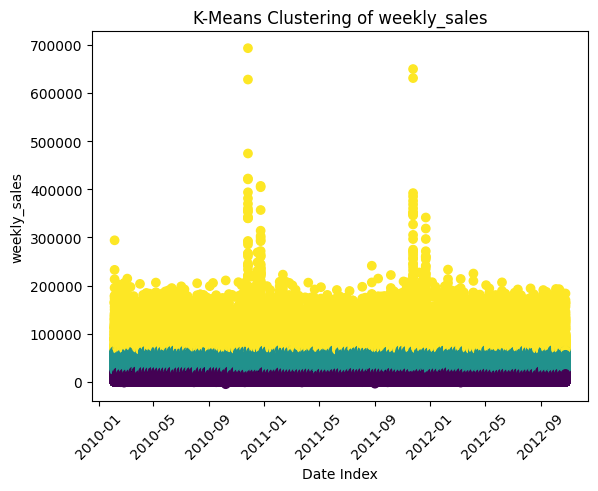

In [4]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Choose an appropriate number of clusters based on the elbow method
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(data.groupby('Cluster')['weekly_sales'].describe())

# Visualize the clusters
plt.scatter(data.index, data['weekly_sales'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of weekly_sales')
plt.xlabel('Date Index')
plt.ylabel('weekly_sales')
plt.xticks(rotation=45)
plt.show()